In [2]:
import subprocess
import os
import numpy as np
import pandas as pd

#importam datasetul nostru
input_file = "Dataset.csv"

#citim din csv si punem in data
data = pd.read_csv(input_file, header = 0)
data.head()

,No.,Country,Date,Confirmed,Death,newConfirmed,newDeath
0,1,Romania,2019-12-31,0,0,0,0
1,2,Romania,2020-01-01,0,0,0,0
2,3,Romania,2020-01-02,0,0,0,0
3,4,Romania,2020-01-03,0,0,0,0
4,5,Romania,2020-01-04,0,0,0,0


In [3]:
#Stergem coloana cu numarul deoarece nu avem nevoie de ele in prelucrarea datelor
data = data.drop(data.columns[0], axis=1)
data

,Country,Date,Confirmed,Death,newConfirmed,newDeath
0,Romania,2019-12-31,0,0,0,0
1,Romania,2020-01-01,0,0,0,0
2,Romania,2020-01-02,0,0,0,0
3,Romania,2020-01-03,0,0,0,0
4,Romania,2020-01-04,0,0,0,0
...,...,...,...,...,...,...
116,Romania,2020-04-25,10635,601,218,34
117,Romania,2020-04-26,11036,619,401,18
118,Romania,2020-04-27,11339,641,303,22
119,Romania,2020-04-28,11616,663,277,22


In [4]:
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

#folosim un label encoder pentru coloanele country si date pentru a le putea transforma in valori numerice
le = preprocessing.LabelEncoder()

le.fit(data['Date'])
data.loc[:, 'Date'] = le.transform(data['Date'])

le.fit(data['Country'])
data.loc[:, 'Country'] = le.transform(data['Country'])

#punem in y doar Country si Date
y = data.drop(data.columns[2], axis=1)
y = y.drop(y.columns[2], axis=1)
y = y.drop(y.columns[2], axis=1)
y = y.drop(y.columns[2], axis=1)

#In X_final punem restul coloanelor
X_final = data.drop(data.columns[1], axis=1)
X_final = X_final.drop(X_final.columns[0], axis=1)

y_train, y_test, X_train, X_test = train_test_split(X_final, y, test_size=0.17)

In [5]:
#X_train contine datele de train pentru input
X_train

,Country,Date
106,0,106
40,0,40
89,0,89
91,0,91
115,0,115
...,...,...
74,0,74
54,0,54
33,0,33
66,0,66


In [6]:
#y_train contine datele de train pentru rezultatul inputului
y_train

,Confirmed,Death,newConfirmed,newDeath
106,7216,372,337,21
40,0,0,0,0
89,1815,43,363,6
91,2245,82,136,17
115,10417,567,321,22
...,...,...,...,...
74,123,0,34,0
54,0,0,0,0
33,0,0,0,0
66,9,0,3,0


In [7]:
#X_test contine datele de input pentru test
X_test

,Country,Date
43,0,43
114,0,114
69,0,69
1,0,1
24,0,24
5,0,5
90,0,90
73,0,73
48,0,48
99,0,99


In [8]:
#y_test contine datele rezultate in urma inputului de test
y_test

,Confirmed,Death,newConfirmed,newDeath
43,0,0,0,0
114,10096,545,386,21
69,15,0,0,0
1,0,0,0,0
24,0,0,0,0
5,0,0,0,0
90,2109,65,294,22
73,89,0,40,0
48,0,0,0,0
99,4761,220,344,23


In [9]:
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error, r2_score

#folosim MLP regressor pentru predictii
#MLP Regressor pentru NN Multy Layer
regr = MLPRegressor(solver='adam', hidden_layer_sizes=(200,100), max_iter=10000, verbose = 'true',activation='relu')

#Antrenam modelul folosind setul de train
regr.fit(X_train, y_train)

#Facem predictii folosind setul de test
y_pred = regr.predict(X_test)

Iteration 1, loss = 1830936.68331180
Iteration 2, loss = 1828448.38639063
Iteration 3, loss = 1826004.90702470
Iteration 4, loss = 1823608.24872706
Iteration 5, loss = 1821248.23365866
Iteration 6, loss = 1818922.92608939
Iteration 7, loss = 1816512.78863579
Iteration 8, loss = 1814184.85218181
Iteration 9, loss = 1811931.23585688
Iteration 10, loss = 1809726.55909973
Iteration 11, loss = 1807623.77860923
Iteration 12, loss = 1805578.43456729
Iteration 13, loss = 1803545.13207835
Iteration 14, loss = 1801503.58069065
Iteration 15, loss = 1799352.95408390
Iteration 16, loss = 1797168.52916932
Iteration 17, loss = 1794917.81617692
Iteration 18, loss = 1792630.88408161
Iteration 19, loss = 1790274.48721072
Iteration 20, loss = 1787843.22107124
Iteration 21, loss = 1785334.27299182
Iteration 22, loss = 1782744.74632543
Iteration 23, loss = 1780071.67574791
Iteration 24, loss = 1777312.05516904
Iteration 25, loss = 1774462.84328087
Iteration 26, loss = 1771520.97618172
Iteration 27, loss = 

Iteration 303, loss = 792801.23026537
Iteration 304, loss = 792423.27374633
Iteration 305, loss = 792044.95649458
Iteration 306, loss = 791664.74124046
Iteration 307, loss = 791286.12621958
Iteration 308, loss = 790900.23684911
Iteration 309, loss = 790515.49139282
Iteration 310, loss = 790125.09090807
Iteration 311, loss = 789742.32182436
Iteration 312, loss = 789346.98422995
Iteration 313, loss = 788956.82712864
Iteration 314, loss = 788563.16174946
Iteration 315, loss = 788166.71257237
Iteration 316, loss = 787770.98132364
Iteration 317, loss = 787381.93987596
Iteration 318, loss = 786968.48853590
Iteration 319, loss = 786567.22440903
Iteration 320, loss = 786163.92639747
Iteration 321, loss = 785758.55567298
Iteration 322, loss = 785350.73035226
Iteration 323, loss = 784942.23176291
Iteration 324, loss = 784532.04570472
Iteration 325, loss = 784121.16009324
Iteration 326, loss = 783709.08362368
Iteration 327, loss = 783294.11645663
Iteration 328, loss = 782878.02201986
Iteration 32

Iteration 625, loss = 620045.25311700
Iteration 626, loss = 619688.33853656
Iteration 627, loss = 618920.36888946
Iteration 628, loss = 618510.04126769
Iteration 629, loss = 617850.67337070
Iteration 630, loss = 617412.34692130
Iteration 631, loss = 616757.52608261
Iteration 632, loss = 616214.72183972
Iteration 633, loss = 615696.03866629
Iteration 634, loss = 615170.94891081
Iteration 635, loss = 614611.04778083
Iteration 636, loss = 614068.97286115
Iteration 637, loss = 613559.47411581
Iteration 638, loss = 613035.51386648
Iteration 639, loss = 612496.69757855
Iteration 640, loss = 611968.72373166
Iteration 641, loss = 611409.25843631
Iteration 642, loss = 610878.07424767
Iteration 643, loss = 610348.99549012
Iteration 644, loss = 609817.80127388
Iteration 645, loss = 609287.31961497
Iteration 646, loss = 608755.70597905
Iteration 647, loss = 608229.04086998
Iteration 648, loss = 607695.83546396
Iteration 649, loss = 607167.13607803
Iteration 650, loss = 606632.87948242
Iteration 65

Iteration 936, loss = 468891.89178041
Iteration 937, loss = 468572.80554651
Iteration 938, loss = 468019.84187676
Iteration 939, loss = 467495.17491650
Iteration 940, loss = 466919.46784991
Iteration 941, loss = 466316.90702687
Iteration 942, loss = 465844.12467048
Iteration 943, loss = 465334.67484966
Iteration 944, loss = 464826.29276945
Iteration 945, loss = 464299.74642459
Iteration 946, loss = 463815.68751766
Iteration 947, loss = 463312.87658787
Iteration 948, loss = 462827.16295149
Iteration 949, loss = 462328.02140532
Iteration 950, loss = 461805.73050027
Iteration 951, loss = 461313.48368877
Iteration 952, loss = 460845.60379107
Iteration 953, loss = 460356.33925899
Iteration 954, loss = 459847.82913128
Iteration 955, loss = 459367.56267595
Iteration 956, loss = 458845.83439887
Iteration 957, loss = 458340.74528364
Iteration 958, loss = 457840.11710704
Iteration 959, loss = 457375.71565577
Iteration 960, loss = 456876.77178199
Iteration 961, loss = 456388.50110700
Iteration 96

Iteration 1258, loss = 318090.48936996
Iteration 1259, loss = 317595.38320862
Iteration 1260, loss = 317100.95967648
Iteration 1261, loss = 316605.64975219
Iteration 1262, loss = 316111.35677316
Iteration 1263, loss = 315615.76047011
Iteration 1264, loss = 315120.54195329
Iteration 1265, loss = 314625.66982351
Iteration 1266, loss = 314129.80166509
Iteration 1267, loss = 313635.14314205
Iteration 1268, loss = 313139.72692721
Iteration 1269, loss = 312643.89214632
Iteration 1270, loss = 312148.55886221
Iteration 1271, loss = 311653.27816471
Iteration 1272, loss = 311158.00844392
Iteration 1273, loss = 310661.75533396
Iteration 1274, loss = 310166.07162578
Iteration 1275, loss = 309670.03502455
Iteration 1276, loss = 309175.07449775
Iteration 1277, loss = 308677.91529738
Iteration 1278, loss = 308182.33782344
Iteration 1279, loss = 307686.24921587
Iteration 1280, loss = 307190.05674716
Iteration 1281, loss = 306693.13248498
Iteration 1282, loss = 306197.06350406
Iteration 1283, loss = 30

Iteration 1548, loss = 179074.48409552
Iteration 1549, loss = 178646.79575041
Iteration 1550, loss = 178218.81594828
Iteration 1551, loss = 177786.74729644
Iteration 1552, loss = 177351.19167870
Iteration 1553, loss = 176915.89763901
Iteration 1554, loss = 176485.12346272
Iteration 1555, loss = 176057.33626034
Iteration 1556, loss = 175631.41529551
Iteration 1557, loss = 175205.95750735
Iteration 1558, loss = 174781.29943761
Iteration 1559, loss = 174355.93662467
Iteration 1560, loss = 173928.97483370
Iteration 1561, loss = 173501.29412531
Iteration 1562, loss = 173074.22148004
Iteration 1563, loss = 172648.35117574
Iteration 1564, loss = 172223.90208981
Iteration 1565, loss = 171801.04691641
Iteration 1566, loss = 171380.23430834
Iteration 1567, loss = 170962.38989441
Iteration 1568, loss = 170551.61263783
Iteration 1569, loss = 170150.89055263
Iteration 1570, loss = 169757.68030383
Iteration 1571, loss = 169378.68154319
Iteration 1572, loss = 168997.20574075
Iteration 1573, loss = 16

Iteration 1847, loss = 77643.60869684
Iteration 1848, loss = 77416.38901760
Iteration 1849, loss = 77169.42803969
Iteration 1850, loss = 76918.37698378
Iteration 1851, loss = 76650.04519766
Iteration 1852, loss = 76372.02396375
Iteration 1853, loss = 76101.00156292
Iteration 1854, loss = 75848.10856198
Iteration 1855, loss = 75611.39978912
Iteration 1856, loss = 75388.71817022
Iteration 1857, loss = 75172.19874681
Iteration 1858, loss = 74940.95968806
Iteration 1859, loss = 74699.14150875
Iteration 1860, loss = 74430.10323974
Iteration 1861, loss = 74158.73909088
Iteration 1862, loss = 73890.28700933
Iteration 1863, loss = 73640.46018427
Iteration 1864, loss = 73409.35538159
Iteration 1865, loss = 73184.05693921
Iteration 1866, loss = 72951.66562929
Iteration 1867, loss = 72709.25008270
Iteration 1868, loss = 72458.10581760
Iteration 1869, loss = 72206.53215257
Iteration 1870, loss = 71959.75603242
Iteration 1871, loss = 71719.59633712
Iteration 1872, loss = 71485.81991377
Iteration 18

Iteration 2179, loss = 23888.52920715
Iteration 2180, loss = 23801.00040855
Iteration 2181, loss = 23709.11365581
Iteration 2182, loss = 23612.19257759
Iteration 2183, loss = 23515.25326007
Iteration 2184, loss = 23423.03262502
Iteration 2185, loss = 23334.36753769
Iteration 2186, loss = 23250.14707292
Iteration 2187, loss = 23167.81932752
Iteration 2188, loss = 23089.23435533
Iteration 2189, loss = 23027.58904827
Iteration 2190, loss = 22966.49547438
Iteration 2191, loss = 22956.70209284
Iteration 2192, loss = 22913.21999027
Iteration 2193, loss = 22856.32025171
Iteration 2194, loss = 22715.33310824
Iteration 2195, loss = 22555.17521353
Iteration 2196, loss = 22394.44592928
Iteration 2197, loss = 22290.21220249
Iteration 2198, loss = 22240.07322125
Iteration 2199, loss = 22201.28771623
Iteration 2200, loss = 22137.40344668
Iteration 2201, loss = 22024.30539775
Iteration 2202, loss = 21894.97979617
Iteration 2203, loss = 21784.17572875
Iteration 2204, loss = 21707.01445268
Iteration 22

Iteration 2492, loss = 7274.72627513
Iteration 2493, loss = 7263.38561754
Iteration 2494, loss = 7151.93445824
Iteration 2495, loss = 7059.95048202
Iteration 2496, loss = 7060.56628881
Iteration 2497, loss = 7092.41831714
Iteration 2498, loss = 7065.59273953
Iteration 2499, loss = 6985.29238490
Iteration 2500, loss = 6925.73232865
Iteration 2501, loss = 6920.90588576
Iteration 2502, loss = 6927.98883230
Iteration 2503, loss = 6897.38051626
Iteration 2504, loss = 6838.59720180
Iteration 2505, loss = 6795.60705288
Iteration 2506, loss = 6784.52139726
Iteration 2507, loss = 6777.87817351
Iteration 2508, loss = 6748.41299770
Iteration 2509, loss = 6703.25670455
Iteration 2510, loss = 6668.20750765
Iteration 2511, loss = 6651.86046446
Iteration 2512, loss = 6638.45630482
Iteration 2513, loss = 6611.64258725
Iteration 2514, loss = 6575.13156963
Iteration 2515, loss = 6543.50706861
Iteration 2516, loss = 6523.19198861
Iteration 2517, loss = 6506.22895087
Iteration 2518, loss = 6482.15215034
I

Iteration 2809, loss = 2517.40719099
Iteration 2810, loss = 2506.97363806
Iteration 2811, loss = 2483.16770285
Iteration 2812, loss = 2456.89841565
Iteration 2813, loss = 2426.76451449
Iteration 2814, loss = 2400.21006439
Iteration 2815, loss = 2381.37735384
Iteration 2816, loss = 2371.92233123
Iteration 2817, loss = 2370.15445375
Iteration 2818, loss = 2372.35478113
Iteration 2819, loss = 2374.98025430
Iteration 2820, loss = 2374.67141162
Iteration 2821, loss = 2370.15212016
Iteration 2822, loss = 2361.10532594
Iteration 2823, loss = 2351.25545399
Iteration 2824, loss = 2338.79006216
Iteration 2825, loss = 2328.14468781
Iteration 2826, loss = 2316.49566134
Iteration 2827, loss = 2305.00788910
Iteration 2828, loss = 2294.55424426
Iteration 2829, loss = 2285.45071106
Iteration 2830, loss = 2277.85070545
Iteration 2831, loss = 2271.47898120
Iteration 2832, loss = 2266.18232579
Iteration 2833, loss = 2262.39947335
Iteration 2834, loss = 2262.08714651
Iteration 2835, loss = 2266.34379913
I

In [10]:
#Convertim datele din float in int
result_int = []
for x in y_pred:
    result_int.append(x.astype(int))

result_int

[array([-84,  -3,  -6,   0]),
 array([9788,  539,  360,   24]),
 array([74,  5,  9, -1]),
 array([-225,  -21,  -10,    0]),
 array([28,  0,  0,  0]),
 array([-40,   6,   2,   0]),
 array([2162,   64,  260,   11]),
 array([99,  6, 11, -1]),
 array([-54,  -1,  -3,   0]),
 array([5022,  242,  298,   16]),
 array([8835,  480,  348,   22]),
 array([-36,  -1,  -3,   0]),
 array([4704,  222,  294,   15]),
 array([322, -13,  84,   4]),
 array([4069,  183,  285,   14]),
 array([-6,  0,  1,  0]),
 array([6293,  321,  315,   18]),
 array([6929,  361,  323,   19]),
 array([566, -22, 138,   7]),
 array([43,  0,  1,  0]),
 array([5, 0, 0, 0])]

In [11]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

#Folosim diferite scalere pentru a puteam face operatii de normalizare, standardizare si scalare
std_scaler = StandardScaler() 
std_scaler2 = StandardScaler()
minMaxScaler = MinMaxScaler()

In [12]:
minMaxScaler.fit(X_train)  
X_train = minMaxScaler.transform(X_train)  

#Normalizam si scalam setul de train
std_scaler.fit(X_train)  
X_train = std_scaler.transform(X_train) 
std_scaler2.fit(X_train)  
X_train = std_scaler2.transform(X_train) 

In [13]:
#Normalizam si scalam setul de test
minMaxScaler.fit(X_test) 
X_test = minMaxScaler.transform(X_test)  
std_scaler.fit(X_test) 
X_test = std_scaler.transform(X_test)  

In [14]:
#Scalam si standardizam datele de test
std_scaler2.fit(X_test) 
X_test = std_scaler2.transform(X_test)  

In [15]:
#Antrenam modeul folosind setul de train
regr.fit(X_train, y_train)

#Facem predictii
y_pred = regr.predict(X_test)
print("Mean squared error: %.2f" % mean_squared_error(y_test, y_pred))

Iteration 1, loss = 1833195.37882938
Iteration 2, loss = 1833153.89234287
Iteration 3, loss = 1833113.94243257
Iteration 4, loss = 1833074.27630860
Iteration 5, loss = 1833034.58958992
Iteration 6, loss = 1832994.55351398
Iteration 7, loss = 1832953.40295304
Iteration 8, loss = 1832911.26698304
Iteration 9, loss = 1832869.18554322
Iteration 10, loss = 1832827.59911407
Iteration 11, loss = 1832784.84732215
Iteration 12, loss = 1832740.57127443
Iteration 13, loss = 1832695.25256372
Iteration 14, loss = 1832648.80774103
Iteration 15, loss = 1832600.87711414
Iteration 16, loss = 1832551.61039381
Iteration 17, loss = 1832501.14342022
Iteration 18, loss = 1832448.99629568
Iteration 19, loss = 1832395.08368952
Iteration 20, loss = 1832339.56552889
Iteration 21, loss = 1832282.11398072
Iteration 22, loss = 1832222.53883367
Iteration 23, loss = 1832160.70536664
Iteration 24, loss = 1832096.93021488
Iteration 25, loss = 1832031.32129817
Iteration 26, loss = 1831963.31828030
Iteration 27, loss = 

Iteration 260, loss = 1378588.23529209
Iteration 261, loss = 1373835.30940339
Iteration 262, loss = 1369060.26118085
Iteration 263, loss = 1364262.97159673
Iteration 264, loss = 1359444.62103206
Iteration 265, loss = 1354604.67491244
Iteration 266, loss = 1349743.42959778
Iteration 267, loss = 1344861.90729091
Iteration 268, loss = 1339960.25154626
Iteration 269, loss = 1335038.05390281
Iteration 270, loss = 1330095.60756875
Iteration 271, loss = 1325134.14060077
Iteration 272, loss = 1320153.75833376
Iteration 273, loss = 1315154.13604489
Iteration 274, loss = 1310136.30709000
Iteration 275, loss = 1305100.21581413
Iteration 276, loss = 1300047.43454205
Iteration 277, loss = 1294977.68194410
Iteration 278, loss = 1289890.75431549
Iteration 279, loss = 1284786.80950550
Iteration 280, loss = 1279666.65645506
Iteration 281, loss = 1274530.74073202
Iteration 282, loss = 1269379.14186307
Iteration 283, loss = 1264212.11627927
Iteration 284, loss = 1259030.51592040
Iteration 285, loss = 125

Iteration 569, loss = 264634.62833122
Iteration 570, loss = 263548.30202217
Iteration 571, loss = 262466.27776239
Iteration 572, loss = 261392.37944261
Iteration 573, loss = 260324.98164849
Iteration 574, loss = 259267.35065955
Iteration 575, loss = 258216.76393096
Iteration 576, loss = 257172.02736495
Iteration 577, loss = 256136.55419556
Iteration 578, loss = 255104.32404098
Iteration 579, loss = 254076.52710093
Iteration 580, loss = 253055.26197362
Iteration 581, loss = 252040.34769654
Iteration 582, loss = 251032.54559972
Iteration 583, loss = 250033.49058611
Iteration 584, loss = 249039.33043149
Iteration 585, loss = 248050.62466088
Iteration 586, loss = 247068.45197280
Iteration 587, loss = 246092.07476232
Iteration 588, loss = 245121.32612619
Iteration 589, loss = 244155.67183315
Iteration 590, loss = 243198.26468310
Iteration 591, loss = 242244.41537373
Iteration 592, loss = 241296.41861236
Iteration 593, loss = 240351.88258703
Iteration 594, loss = 239416.12167724
Iteration 59

Iteration 879, loss = 80334.08715216
Iteration 880, loss = 80014.24099158
Iteration 881, loss = 79696.95275923
Iteration 882, loss = 79381.91707439
Iteration 883, loss = 79067.27669443
Iteration 884, loss = 78753.42933365
Iteration 885, loss = 78440.77611659
Iteration 886, loss = 78128.47860505
Iteration 887, loss = 77817.21460193
Iteration 888, loss = 77507.83333661
Iteration 889, loss = 77199.97009945
Iteration 890, loss = 76892.23083464
Iteration 891, loss = 76587.13321041
Iteration 892, loss = 76283.72520193
Iteration 893, loss = 75981.06782774
Iteration 894, loss = 75679.61120079
Iteration 895, loss = 75379.59967012
Iteration 896, loss = 75080.20020220
Iteration 897, loss = 74781.60371005
Iteration 898, loss = 74484.72898558
Iteration 899, loss = 74188.15258182
Iteration 900, loss = 73893.20543612
Iteration 901, loss = 73598.98483882
Iteration 902, loss = 73306.16686117
Iteration 903, loss = 73013.82735743
Iteration 904, loss = 72723.00000666
Iteration 905, loss = 72433.35350609
I

Iteration 1210, loss = 21960.11639737
Iteration 1211, loss = 21879.29642124
Iteration 1212, loss = 21798.96494002
Iteration 1213, loss = 21719.10393229
Iteration 1214, loss = 21639.42995656
Iteration 1215, loss = 21560.07573950
Iteration 1216, loss = 21481.24366346
Iteration 1217, loss = 21402.68313860
Iteration 1218, loss = 21324.34822587
Iteration 1219, loss = 21246.46119728
Iteration 1220, loss = 21168.88680154
Iteration 1221, loss = 21091.76893158
Iteration 1222, loss = 21015.07356875
Iteration 1223, loss = 20938.82094342
Iteration 1224, loss = 20862.88525603
Iteration 1225, loss = 20787.22694831
Iteration 1226, loss = 20711.77024865
Iteration 1227, loss = 20636.85067180
Iteration 1228, loss = 20562.11693565
Iteration 1229, loss = 20487.96564994
Iteration 1230, loss = 20414.25484268
Iteration 1231, loss = 20340.85710172
Iteration 1232, loss = 20267.53082290
Iteration 1233, loss = 20194.76953374
Iteration 1234, loss = 20122.13139170
Iteration 1235, loss = 20049.91522843
Iteration 12

Iteration 1518, loss = 7677.03087838
Iteration 1519, loss = 7655.58379865
Iteration 1520, loss = 7634.22842185
Iteration 1521, loss = 7612.98756414
Iteration 1522, loss = 7591.82330843
Iteration 1523, loss = 7570.83015133
Iteration 1524, loss = 7549.94488631
Iteration 1525, loss = 7529.08610333
Iteration 1526, loss = 7508.39081096
Iteration 1527, loss = 7487.80402046
Iteration 1528, loss = 7467.31774348
Iteration 1529, loss = 7447.02261208
Iteration 1530, loss = 7426.73633303
Iteration 1531, loss = 7406.43280501
Iteration 1532, loss = 7386.34902933
Iteration 1533, loss = 7366.36898876
Iteration 1534, loss = 7346.38132790
Iteration 1535, loss = 7326.48314757
Iteration 1536, loss = 7306.68053966
Iteration 1537, loss = 7286.91172913
Iteration 1538, loss = 7267.27530681
Iteration 1539, loss = 7247.69067071
Iteration 1540, loss = 7228.10410051
Iteration 1541, loss = 7208.61086352
Iteration 1542, loss = 7189.19351343
Iteration 1543, loss = 7169.75659381
Iteration 1544, loss = 7150.32326177
I

Iteration 1835, loss = 3782.61656670
Iteration 1836, loss = 3776.17398452
Iteration 1837, loss = 3769.73817123
Iteration 1838, loss = 3763.30510429
Iteration 1839, loss = 3756.88853834
Iteration 1840, loss = 3750.47968126
Iteration 1841, loss = 3744.08197146
Iteration 1842, loss = 3737.71112045
Iteration 1843, loss = 3731.35090630
Iteration 1844, loss = 3725.03320156
Iteration 1845, loss = 3718.71588729
Iteration 1846, loss = 3712.43757833
Iteration 1847, loss = 3706.16975501
Iteration 1848, loss = 3699.92317666
Iteration 1849, loss = 3693.69460562
Iteration 1850, loss = 3687.46265252
Iteration 1851, loss = 3681.28146408
Iteration 1852, loss = 3675.13056956
Iteration 1853, loss = 3668.97726450
Iteration 1854, loss = 3662.84285408
Iteration 1855, loss = 3656.73807967
Iteration 1856, loss = 3650.66560920
Iteration 1857, loss = 3644.60608816
Iteration 1858, loss = 3638.56483801
Iteration 1859, loss = 3632.53141788
Iteration 1860, loss = 3626.52825681
Iteration 1861, loss = 3620.55969765
I

Iteration 2174, loss = 2327.47393425
Iteration 2175, loss = 2324.14831948
Iteration 2176, loss = 2320.82982889
Iteration 2177, loss = 2317.51326154
Iteration 2178, loss = 2314.20544762
Iteration 2179, loss = 2310.88722496
Iteration 2180, loss = 2307.57765301
Iteration 2181, loss = 2304.28412122
Iteration 2182, loss = 2300.98416925
Iteration 2183, loss = 2297.72164893
Iteration 2184, loss = 2294.50328854
Iteration 2185, loss = 2291.28666095
Iteration 2186, loss = 2288.05470537
Iteration 2187, loss = 2284.82761245
Iteration 2188, loss = 2281.60966551
Iteration 2189, loss = 2278.37894817
Iteration 2190, loss = 2275.16446440
Iteration 2191, loss = 2271.95897718
Iteration 2192, loss = 2268.74214963
Iteration 2193, loss = 2265.52795951
Iteration 2194, loss = 2262.35368267
Iteration 2195, loss = 2259.20355661
Iteration 2196, loss = 2256.05078526
Iteration 2197, loss = 2252.89797252
Iteration 2198, loss = 2249.73949099
Iteration 2199, loss = 2246.58334390
Iteration 2200, loss = 2243.45939644
I

Iteration 2482, loss = 1585.57359097
Iteration 2483, loss = 1583.75012916
Iteration 2484, loss = 1581.93884967
Iteration 2485, loss = 1580.12864197
Iteration 2486, loss = 1578.30138259
Iteration 2487, loss = 1576.47398746
Iteration 2488, loss = 1574.64704593
Iteration 2489, loss = 1572.82071200
Iteration 2490, loss = 1570.99847457
Iteration 2491, loss = 1569.17949989
Iteration 2492, loss = 1567.36104997
Iteration 2493, loss = 1565.54622550
Iteration 2494, loss = 1563.73416196
Iteration 2495, loss = 1561.92533802
Iteration 2496, loss = 1560.11906160
Iteration 2497, loss = 1558.33181423
Iteration 2498, loss = 1556.52939541
Iteration 2499, loss = 1554.73121981
Iteration 2500, loss = 1552.94335581
Iteration 2501, loss = 1551.15709063
Iteration 2502, loss = 1549.37219479
Iteration 2503, loss = 1547.59258780
Iteration 2504, loss = 1545.81799191
Iteration 2505, loss = 1544.04422241
Iteration 2506, loss = 1542.27418123
Iteration 2507, loss = 1540.50594754
Iteration 2508, loss = 1538.74481426
I

Iteration 2790, loss = 1126.60756841
Iteration 2791, loss = 1125.40947015
Iteration 2792, loss = 1124.24980768
Iteration 2793, loss = 1123.08179526
Iteration 2794, loss = 1121.89636231
Iteration 2795, loss = 1120.69425588
Iteration 2796, loss = 1119.49064151
Iteration 2797, loss = 1118.32037303
Iteration 2798, loss = 1117.15020056
Iteration 2799, loss = 1115.98068893
Iteration 2800, loss = 1114.81152685
Iteration 2801, loss = 1113.64336376
Iteration 2802, loss = 1112.47633806
Iteration 2803, loss = 1111.30752483
Iteration 2804, loss = 1110.13918829
Iteration 2805, loss = 1108.97045391
Iteration 2806, loss = 1107.82301111
Iteration 2807, loss = 1106.67179115
Iteration 2808, loss = 1105.50631222
Iteration 2809, loss = 1104.34329307
Iteration 2810, loss = 1103.19671550
Iteration 2811, loss = 1102.04882803
Iteration 2812, loss = 1100.90114527
Iteration 2813, loss = 1099.75526497
Iteration 2814, loss = 1098.60974767
Iteration 2815, loss = 1097.48381215
Iteration 2816, loss = 1096.35029666
I

Iteration 3109, loss = 817.60205783
Iteration 3110, loss = 816.87192881
Iteration 3111, loss = 816.13056158
Iteration 3112, loss = 815.38472901
Iteration 3113, loss = 814.65166759
Iteration 3114, loss = 813.92784189
Iteration 3115, loss = 813.19729208
Iteration 3116, loss = 812.46360045
Iteration 3117, loss = 811.74351291
Iteration 3118, loss = 811.01690162
Iteration 3119, loss = 810.28968186
Iteration 3120, loss = 809.55878247
Iteration 3121, loss = 808.83604322
Iteration 3122, loss = 808.11094657
Iteration 3123, loss = 807.38505540
Iteration 3124, loss = 806.66109645
Iteration 3125, loss = 805.94447700
Iteration 3126, loss = 805.23006733
Iteration 3127, loss = 804.51375146
Iteration 3128, loss = 803.79633302
Iteration 3129, loss = 803.07565120
Iteration 3130, loss = 802.36929395
Iteration 3131, loss = 801.66418937
Iteration 3132, loss = 800.95304515
Iteration 3133, loss = 800.24001284
Iteration 3134, loss = 799.53332335
Iteration 3135, loss = 798.82711760
Iteration 3136, loss = 798.1

Iteration 3439, loss = 634.40610486
Iteration 3440, loss = 634.00543681
Iteration 3441, loss = 633.60538164
Iteration 3442, loss = 633.20672476
Iteration 3443, loss = 632.80861995
Iteration 3444, loss = 632.41151869
Iteration 3445, loss = 632.01601842
Iteration 3446, loss = 631.62181601
Iteration 3447, loss = 631.22647410
Iteration 3448, loss = 630.83520290
Iteration 3449, loss = 630.44389223
Iteration 3450, loss = 630.05278842
Iteration 3451, loss = 629.66181884
Iteration 3452, loss = 629.27183883
Iteration 3453, loss = 628.88359257
Iteration 3454, loss = 628.49613040
Iteration 3455, loss = 628.10925684
Iteration 3456, loss = 627.72682597
Iteration 3457, loss = 627.34198901
Iteration 3458, loss = 626.95796973
Iteration 3459, loss = 626.57686618
Iteration 3460, loss = 626.19422381
Iteration 3461, loss = 625.81281610
Iteration 3462, loss = 625.43179381
Iteration 3463, loss = 625.05555343
Iteration 3464, loss = 624.67554687
Iteration 3465, loss = 624.29813835
Iteration 3466, loss = 623.9

Iteration 3775, loss = 535.80794822
Iteration 3776, loss = 535.56236976
Iteration 3777, loss = 535.31317264
Iteration 3778, loss = 535.06031825
Iteration 3779, loss = 534.80627262
Iteration 3780, loss = 534.54623855
Iteration 3781, loss = 534.28115448
Iteration 3782, loss = 534.01820306
Iteration 3783, loss = 533.74852984
Iteration 3784, loss = 533.47716983
Iteration 3785, loss = 533.20267951
Iteration 3786, loss = 532.92458065
Iteration 3787, loss = 532.63812827
Iteration 3788, loss = 532.34569745
Iteration 3789, loss = 532.04696164
Iteration 3790, loss = 531.75340702
Iteration 3791, loss = 531.45351956
Iteration 3792, loss = 531.14806723
Iteration 3793, loss = 530.84706975
Iteration 3794, loss = 530.54191967
Iteration 3795, loss = 530.23447563
Iteration 3796, loss = 529.92540124
Iteration 3797, loss = 529.61557560
Iteration 3798, loss = 529.29586926
Iteration 3799, loss = 528.97870969
Iteration 3800, loss = 528.66150329
Iteration 3801, loss = 528.34014685
Iteration 3802, loss = 528.0

Iteration 4104, loss = 470.08639081
Iteration 4105, loss = 469.99895435
Iteration 4106, loss = 469.91765382
Iteration 4107, loss = 469.83513893
Iteration 4108, loss = 469.74935324
Iteration 4109, loss = 469.66002973
Iteration 4110, loss = 469.58065357
Iteration 4111, loss = 469.49665627
Iteration 4112, loss = 469.41061464
Iteration 4113, loss = 469.32773553
Iteration 4114, loss = 469.24568997
Iteration 4115, loss = 469.15811354
Iteration 4116, loss = 469.07545010
Iteration 4117, loss = 468.99739075
Iteration 4118, loss = 468.91200202
Iteration 4119, loss = 468.82621934
Iteration 4120, loss = 468.74568246
Iteration 4121, loss = 468.65996570
Iteration 4122, loss = 468.57579994
Iteration 4123, loss = 468.49389623
Iteration 4124, loss = 468.41397810
Iteration 4125, loss = 468.33101698
Iteration 4126, loss = 468.24683046
Iteration 4127, loss = 468.16232100
Iteration 4128, loss = 468.08254546
Iteration 4129, loss = 468.00124121
Iteration 4130, loss = 467.91910896
Iteration 4131, loss = 467.8

Iteration 4415, loss = 448.03599235
Iteration 4416, loss = 447.96603231
Iteration 4417, loss = 447.89699031
Iteration 4418, loss = 447.83147574
Iteration 4419, loss = 447.76614071
Iteration 4420, loss = 447.69744141
Iteration 4421, loss = 447.62445039
Iteration 4422, loss = 447.56140273
Iteration 4423, loss = 447.49650443
Iteration 4424, loss = 447.43354944
Iteration 4425, loss = 447.36466180
Iteration 4426, loss = 447.29395308
Iteration 4427, loss = 447.22963955
Iteration 4428, loss = 447.17204729
Iteration 4429, loss = 447.10867710
Iteration 4430, loss = 447.04004218
Iteration 4431, loss = 446.98296055
Iteration 4432, loss = 446.92992453
Iteration 4433, loss = 446.87366107
Iteration 4434, loss = 446.81160379
Iteration 4435, loss = 446.74657145
Iteration 4436, loss = 446.69122782
Iteration 4437, loss = 446.63252419
Iteration 4438, loss = 446.57336247
Iteration 4439, loss = 446.51397585
Iteration 4440, loss = 446.45612656
Iteration 4441, loss = 446.40685764
Iteration 4442, loss = 446.3

Iteration 4738, loss = 432.59721720
Iteration 4739, loss = 432.55408738
Iteration 4740, loss = 432.51963212
Iteration 4741, loss = 432.48827272
Iteration 4742, loss = 432.45458297
Iteration 4743, loss = 432.41674670
Iteration 4744, loss = 432.37918936
Iteration 4745, loss = 432.34111500
Iteration 4746, loss = 432.30309667
Iteration 4747, loss = 432.27434550
Iteration 4748, loss = 432.24263804
Iteration 4749, loss = 432.20504209
Iteration 4750, loss = 432.16568803
Iteration 4751, loss = 432.13578176
Iteration 4752, loss = 432.10339508
Iteration 4753, loss = 432.06990903
Iteration 4754, loss = 432.03619888
Iteration 4755, loss = 432.00813723
Iteration 4756, loss = 431.96632661
Iteration 4757, loss = 431.93019652
Iteration 4758, loss = 431.89221429
Iteration 4759, loss = 431.86206309
Iteration 4760, loss = 431.83231358
Iteration 4761, loss = 431.79789817
Iteration 4762, loss = 431.75684215
Iteration 4763, loss = 431.72121764
Iteration 4764, loss = 431.68720732
Iteration 4765, loss = 431.6

Iteration 5066, loss = 422.35749360
Iteration 5067, loss = 422.32557337
Iteration 5068, loss = 422.29676322
Iteration 5069, loss = 422.27054084
Iteration 5070, loss = 422.24189861
Iteration 5071, loss = 422.21787047
Iteration 5072, loss = 422.19032883
Iteration 5073, loss = 422.16032340
Iteration 5074, loss = 422.13360037
Iteration 5075, loss = 422.10508148
Iteration 5076, loss = 422.07629902
Iteration 5077, loss = 422.05415667
Iteration 5078, loss = 422.02443549
Iteration 5079, loss = 421.99696247
Iteration 5080, loss = 421.97325122
Iteration 5081, loss = 421.94574742
Iteration 5082, loss = 421.91641412
Iteration 5083, loss = 421.88764169
Iteration 5084, loss = 421.85689514
Iteration 5085, loss = 421.82836080
Iteration 5086, loss = 421.80257551
Iteration 5087, loss = 421.77603100
Iteration 5088, loss = 421.74960289
Iteration 5089, loss = 421.72003233
Iteration 5090, loss = 421.69168517
Iteration 5091, loss = 421.67068468
Iteration 5092, loss = 421.64235143
Iteration 5093, loss = 421.6

Iteration 5374, loss = 415.41357696
Iteration 5375, loss = 415.40120987
Iteration 5376, loss = 415.37827621
Iteration 5377, loss = 415.36585735
Iteration 5378, loss = 415.35557805
Iteration 5379, loss = 415.33783529
Iteration 5380, loss = 415.30931290
Iteration 5381, loss = 415.29873997
Iteration 5382, loss = 415.28290063
Iteration 5383, loss = 415.26322314
Iteration 5384, loss = 415.25219373
Iteration 5385, loss = 415.23986122
Iteration 5386, loss = 415.22407643
Iteration 5387, loss = 415.20610094
Iteration 5388, loss = 415.18853920
Iteration 5389, loss = 415.17190592
Iteration 5390, loss = 415.15034462
Iteration 5391, loss = 415.12790421
Iteration 5392, loss = 415.11691195
Iteration 5393, loss = 415.10537495
Iteration 5394, loss = 415.08899825
Iteration 5395, loss = 415.07043348
Iteration 5396, loss = 415.04901248
Iteration 5397, loss = 415.03932300
Iteration 5398, loss = 415.02864485
Iteration 5399, loss = 415.01694248
Iteration 5400, loss = 415.00263087
Iteration 5401, loss = 414.9

Iteration 5687, loss = 410.79938111
Iteration 5688, loss = 410.78521175
Iteration 5689, loss = 410.77227646
Iteration 5690, loss = 410.75591898
Iteration 5691, loss = 410.73622107
Iteration 5692, loss = 410.72512587
Iteration 5693, loss = 410.71287015
Iteration 5694, loss = 410.69940513
Iteration 5695, loss = 410.68245553
Iteration 5696, loss = 410.66990709
Iteration 5697, loss = 410.65969819
Iteration 5698, loss = 410.64944112
Iteration 5699, loss = 410.63508174
Iteration 5700, loss = 410.62454702
Iteration 5701, loss = 410.60994286
Iteration 5702, loss = 410.59106099
Iteration 5703, loss = 410.57466037
Iteration 5704, loss = 410.55734658
Iteration 5705, loss = 410.54449807
Iteration 5706, loss = 410.52702143
Iteration 5707, loss = 410.52097040
Iteration 5708, loss = 410.50505226
Iteration 5709, loss = 410.48681438
Iteration 5710, loss = 410.47568001
Iteration 5711, loss = 410.46360955
Iteration 5712, loss = 410.44950144
Iteration 5713, loss = 410.43752700
Iteration 5714, loss = 410.4

Iteration 6024, loss = 406.42909308
Iteration 6025, loss = 406.41243615
Iteration 6026, loss = 406.40197373
Iteration 6027, loss = 406.39314504
Iteration 6028, loss = 406.37938877
Iteration 6029, loss = 406.36975635
Iteration 6030, loss = 406.34897835
Iteration 6031, loss = 406.33103277
Iteration 6032, loss = 406.32194222
Iteration 6033, loss = 406.30762744
Iteration 6034, loss = 406.30300254
Iteration 6035, loss = 406.29250927
Iteration 6036, loss = 406.28323019
Iteration 6037, loss = 406.27579393
Iteration 6038, loss = 406.26016181
Iteration 6039, loss = 406.24344900
Iteration 6040, loss = 406.24436737
Iteration 6041, loss = 406.23581573
Iteration 6042, loss = 406.21675996
Iteration 6043, loss = 406.20382712
Iteration 6044, loss = 406.19552104
Iteration 6045, loss = 406.17767736
Iteration 6046, loss = 406.17633878
Iteration 6047, loss = 406.15643727
Iteration 6048, loss = 406.14708692
Iteration 6049, loss = 406.13468449
Iteration 6050, loss = 406.13124570
Iteration 6051, loss = 406.1

Iteration 6347, loss = 403.34986598
Iteration 6348, loss = 403.34844738
Iteration 6349, loss = 403.33442784
Iteration 6350, loss = 403.32125968
Iteration 6351, loss = 403.31445257
Iteration 6352, loss = 403.31246917
Iteration 6353, loss = 403.29791172
Iteration 6354, loss = 403.28424589
Iteration 6355, loss = 403.29201359
Iteration 6356, loss = 403.29091601
Iteration 6357, loss = 403.27839419
Iteration 6358, loss = 403.27157343
Iteration 6359, loss = 403.27034975
Iteration 6360, loss = 403.25443724
Iteration 6361, loss = 403.25819894
Iteration 6362, loss = 403.23456771
Iteration 6363, loss = 403.22833727
Iteration 6364, loss = 403.22351783
Iteration 6365, loss = 403.20681184
Iteration 6366, loss = 403.20129869
Iteration 6367, loss = 403.19322489
Iteration 6368, loss = 403.20064249
Iteration 6369, loss = 403.19753506
Iteration 6370, loss = 403.17364818
Iteration 6371, loss = 403.16552752
Iteration 6372, loss = 403.15916423
Iteration 6373, loss = 403.14671352
Iteration 6374, loss = 403.1

Iteration 6638, loss = 401.10406734
Iteration 6639, loss = 401.10024385
Iteration 6640, loss = 401.09235161
Iteration 6641, loss = 401.08078665
Iteration 6642, loss = 401.06573605
Iteration 6643, loss = 401.06036238
Iteration 6644, loss = 401.04534512
Iteration 6645, loss = 401.03842566
Iteration 6646, loss = 401.04259111
Iteration 6647, loss = 401.03517161
Iteration 6648, loss = 401.02073327
Iteration 6649, loss = 401.01937502
Iteration 6650, loss = 401.01198228
Iteration 6651, loss = 400.99366115
Iteration 6652, loss = 400.97371140
Iteration 6653, loss = 400.98409517
Iteration 6654, loss = 400.98420812
Iteration 6655, loss = 400.95597921
Iteration 6656, loss = 400.94193569
Iteration 6657, loss = 400.94134667
Iteration 6658, loss = 400.93304552
Iteration 6659, loss = 400.92140927
Iteration 6660, loss = 400.91734718
Iteration 6661, loss = 400.90303862
Iteration 6662, loss = 400.90037476
Iteration 6663, loss = 400.88694949
Iteration 6664, loss = 400.87492750
Iteration 6665, loss = 400.8

Iteration 6902, loss = 398.98322619
Iteration 6903, loss = 398.98129111
Iteration 6904, loss = 398.95557876
Iteration 6905, loss = 398.95633071
Iteration 6906, loss = 398.95306522
Iteration 6907, loss = 398.95433835
Iteration 6908, loss = 398.94437116
Iteration 6909, loss = 398.93882800
Iteration 6910, loss = 398.92454880
Iteration 6911, loss = 398.91995685
Iteration 6912, loss = 398.91570960
Iteration 6913, loss = 398.90448602
Iteration 6914, loss = 398.89968324
Iteration 6915, loss = 398.88855773
Iteration 6916, loss = 398.87674850
Iteration 6917, loss = 398.86867215
Iteration 6918, loss = 398.85877291
Iteration 6919, loss = 398.84699915
Iteration 6920, loss = 398.84720288
Iteration 6921, loss = 398.84090631
Iteration 6922, loss = 398.82610436
Iteration 6923, loss = 398.81297127
Iteration 6924, loss = 398.81310853
Iteration 6925, loss = 398.81254776
Iteration 6926, loss = 398.82544105
Iteration 6927, loss = 398.81145812
Iteration 6928, loss = 398.77761510
Iteration 6929, loss = 398.7

Iteration 7165, loss = 397.00840202
Iteration 7166, loss = 397.00409756
Iteration 7167, loss = 396.99891272
Iteration 7168, loss = 396.97669814
Iteration 7169, loss = 396.96782128
Iteration 7170, loss = 396.97194316
Iteration 7171, loss = 396.97901249
Iteration 7172, loss = 396.97300591
Iteration 7173, loss = 396.96140963
Iteration 7174, loss = 396.95107857
Iteration 7175, loss = 396.95276908
Iteration 7176, loss = 396.93990984
Iteration 7177, loss = 396.93714802
Iteration 7178, loss = 396.91263024
Iteration 7179, loss = 396.93168382
Iteration 7180, loss = 396.91306133
Iteration 7181, loss = 396.90101698
Iteration 7182, loss = 396.89134702
Iteration 7183, loss = 396.88132097
Iteration 7184, loss = 396.87174834
Iteration 7185, loss = 396.86578812
Iteration 7186, loss = 396.84382148
Iteration 7187, loss = 396.83465658
Iteration 7188, loss = 396.84323829
Iteration 7189, loss = 396.83442662
Iteration 7190, loss = 396.81052782
Iteration 7191, loss = 396.80319503
Iteration 7192, loss = 396.7

Iteration 7451, loss = 394.63303045
Iteration 7452, loss = 394.60463799
Iteration 7453, loss = 394.61301130
Iteration 7454, loss = 394.61010642
Iteration 7455, loss = 394.59322903
Iteration 7456, loss = 394.58821714
Iteration 7457, loss = 394.58272462
Iteration 7458, loss = 394.56410632
Iteration 7459, loss = 394.55108630
Iteration 7460, loss = 394.55257541
Iteration 7461, loss = 394.53988851
Iteration 7462, loss = 394.53509504
Iteration 7463, loss = 394.52218974
Iteration 7464, loss = 394.51461620
Iteration 7465, loss = 394.49741392
Iteration 7466, loss = 394.50809995
Iteration 7467, loss = 394.50063164
Iteration 7468, loss = 394.48270507
Iteration 7469, loss = 394.48882933
Iteration 7470, loss = 394.49091040
Iteration 7471, loss = 394.47840666
Iteration 7472, loss = 394.46185876
Iteration 7473, loss = 394.46328163
Iteration 7474, loss = 394.43615246
Iteration 7475, loss = 394.42072217
Iteration 7476, loss = 394.43234409
Iteration 7477, loss = 394.44720097
Iteration 7478, loss = 394.4

Iteration 7772, loss = 391.78119800
Iteration 7773, loss = 391.76633153
Iteration 7774, loss = 391.73771103
Iteration 7775, loss = 391.73337157
Iteration 7776, loss = 391.72076007
Iteration 7777, loss = 391.71151590
Iteration 7778, loss = 391.70920656
Iteration 7779, loss = 391.69296462
Iteration 7780, loss = 391.67475767
Iteration 7781, loss = 391.65895098
Iteration 7782, loss = 391.62294051
Iteration 7783, loss = 391.61221439
Iteration 7784, loss = 391.62942530
Iteration 7785, loss = 391.59667309
Iteration 7786, loss = 391.56763376
Iteration 7787, loss = 391.57347980
Iteration 7788, loss = 391.54088560
Iteration 7789, loss = 391.54627151
Iteration 7790, loss = 391.53598477
Iteration 7791, loss = 391.50090780
Iteration 7792, loss = 391.50674916
Iteration 7793, loss = 391.49694691
Iteration 7794, loss = 391.47400492
Iteration 7795, loss = 391.46201506
Iteration 7796, loss = 391.45783345
Iteration 7797, loss = 391.42771237
Iteration 7798, loss = 391.40898645
Iteration 7799, loss = 391.4

Iteration 8076, loss = 388.07705391
Iteration 8077, loss = 388.05720667
Iteration 8078, loss = 388.04349794
Iteration 8079, loss = 388.01812321
Iteration 8080, loss = 387.99896343
Iteration 8081, loss = 388.01464780
Iteration 8082, loss = 388.00340844
Iteration 8083, loss = 387.99816614
Iteration 8084, loss = 387.98854900
Iteration 8085, loss = 387.98543353
Iteration 8086, loss = 387.96501872
Iteration 8087, loss = 387.94261809
Iteration 8088, loss = 387.92864353
Iteration 8089, loss = 387.91718620
Iteration 8090, loss = 387.90095049
Iteration 8091, loss = 387.88981713
Iteration 8092, loss = 387.88819061
Iteration 8093, loss = 387.87697915
Iteration 8094, loss = 387.87272826
Iteration 8095, loss = 387.86058197
Iteration 8096, loss = 387.85725491
Iteration 8097, loss = 387.84654308
Iteration 8098, loss = 387.84041252
Iteration 8099, loss = 387.84196984
Iteration 8100, loss = 387.83293901
Iteration 8101, loss = 387.81238437
Iteration 8102, loss = 387.80666390
Iteration 8103, loss = 387.8

Iteration 8396, loss = 386.01231616
Iteration 8397, loss = 386.02492604
Iteration 8398, loss = 386.00828842
Iteration 8399, loss = 385.98296856
Iteration 8400, loss = 386.01453159
Iteration 8401, loss = 386.00088526
Iteration 8402, loss = 385.97501189
Iteration 8403, loss = 385.97843149
Iteration 8404, loss = 385.97949536
Iteration 8405, loss = 385.97730971
Iteration 8406, loss = 385.96845725
Iteration 8407, loss = 385.96711704
Iteration 8408, loss = 385.98241726
Iteration 8409, loss = 385.95962648
Iteration 8410, loss = 385.94984859
Iteration 8411, loss = 385.94338812
Iteration 8412, loss = 385.93312975
Iteration 8413, loss = 385.92061491
Iteration 8414, loss = 385.92057240
Iteration 8415, loss = 385.91305947
Iteration 8416, loss = 385.90021291
Iteration 8417, loss = 385.89720664
Iteration 8418, loss = 385.88652990
Iteration 8419, loss = 385.87787075
Iteration 8420, loss = 385.90226218
Iteration 8421, loss = 385.89377609
Iteration 8422, loss = 385.86894837
Iteration 8423, loss = 385.8

Iteration 8722, loss = 384.26697182
Iteration 8723, loss = 384.27193348
Iteration 8724, loss = 384.26500199
Iteration 8725, loss = 384.27305478
Iteration 8726, loss = 384.24907564
Iteration 8727, loss = 384.24860310
Iteration 8728, loss = 384.24811732
Iteration 8729, loss = 384.24712497
Iteration 8730, loss = 384.21418265
Iteration 8731, loss = 384.19250342
Iteration 8732, loss = 384.21269923
Iteration 8733, loss = 384.20421751
Iteration 8734, loss = 384.19888675
Iteration 8735, loss = 384.18459457
Iteration 8736, loss = 384.17359572
Iteration 8737, loss = 384.17153279
Iteration 8738, loss = 384.16960992
Iteration 8739, loss = 384.18787635
Iteration 8740, loss = 384.16787756
Iteration 8741, loss = 384.16859807
Iteration 8742, loss = 384.18005416
Iteration 8743, loss = 384.17460881
Iteration 8744, loss = 384.16285600
Iteration 8745, loss = 384.15864286
Iteration 8746, loss = 384.15794587
Iteration 8747, loss = 384.13011370
Iteration 8748, loss = 384.11352435
Iteration 8749, loss = 384.1

Iteration 9040, loss = 382.66260695
Iteration 9041, loss = 382.63745278
Iteration 9042, loss = 382.60532792
Iteration 9043, loss = 382.58302001
Iteration 9044, loss = 382.60451790
Iteration 9045, loss = 382.63121975
Iteration 9046, loss = 382.59856723
Iteration 9047, loss = 382.57415696
Iteration 9048, loss = 382.58541114
Iteration 9049, loss = 382.57556779
Iteration 9050, loss = 382.56094519
Iteration 9051, loss = 382.56733530
Iteration 9052, loss = 382.58131283
Iteration 9053, loss = 382.55028197
Iteration 9054, loss = 382.55340996
Iteration 9055, loss = 382.54935880
Iteration 9056, loss = 382.52325993
Iteration 9057, loss = 382.53309770
Iteration 9058, loss = 382.52354653
Iteration 9059, loss = 382.49973016
Iteration 9060, loss = 382.50837091
Iteration 9061, loss = 382.49447487
Iteration 9062, loss = 382.50781160
Iteration 9063, loss = 382.49547159
Iteration 9064, loss = 382.48293944
Iteration 9065, loss = 382.51743738
Iteration 9066, loss = 382.51383745
Iteration 9067, loss = 382.4

Iteration 9369, loss = 380.98237354
Iteration 9370, loss = 380.98915288
Iteration 9371, loss = 380.98722425
Iteration 9372, loss = 380.97704411
Iteration 9373, loss = 380.97504403
Iteration 9374, loss = 380.96025600
Iteration 9375, loss = 380.96308722
Iteration 9376, loss = 380.96449002
Iteration 9377, loss = 380.95872645
Iteration 9378, loss = 380.95339896
Iteration 9379, loss = 380.92592809
Iteration 9380, loss = 380.93687776
Iteration 9381, loss = 380.95866071
Iteration 9382, loss = 380.92622176
Iteration 9383, loss = 380.92644751
Iteration 9384, loss = 380.92478373
Iteration 9385, loss = 380.90591222
Iteration 9386, loss = 380.91066514
Iteration 9387, loss = 380.90030653
Iteration 9388, loss = 380.88029477
Iteration 9389, loss = 380.89625089
Iteration 9390, loss = 380.87962273
Iteration 9391, loss = 380.89397566
Iteration 9392, loss = 380.88667867
Iteration 9393, loss = 380.86160540
Iteration 9394, loss = 380.86866953
Iteration 9395, loss = 380.85274343
Iteration 9396, loss = 380.8

In [16]:
#Convertim din float in int
result_int = []
for x in y_pred:
    result_int.append(x.astype(int))

result_int

[array([0, 0, 0, 0]),
 array([7281,  364,  389,   20]),
 array([3, 0, 1, 0]),
 array([0, 0, 0, 0]),
 array([0, 0, 0, 0]),
 array([0, 0, 0, 0]),
 array([512,   5, 101,   2]),
 array([9, 0, 3, 0]),
 array([0, 0, 0, 0]),
 array([2315,   81,  253,   13]),
 array([6234,  305,  380,   22]),
 array([0, 0, 0, 0]),
 array([2062,   67,  248,   11]),
 array([77,  0, 14,  0]),
 array([1562,   39,  233,    7]),
 array([-1,  0,  0,  0]),
 array([3524,  153,  330,   20]),
 array([4172,  189,  349,   21]),
 array([154,   0,  26,   0]),
 array([0, 0, 0, 0]),
 array([0, 0, 0, 0])]

In [17]:
import warnings
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeRegressor

warnings.filterwarnings('ignore')

#MLP Regressor pentru NN Multy Layer
regr = MLPRegressor(solver='adam', hidden_layer_sizes=(200,100), max_iter=10000,activation='relu')
#regr = MLPRegressor(solver=’lbfgs’, hiddenlayersizes=(200,150), maxiter=20000,activation=’relu’, alpha = 0.0003)
#regr = MLPRegressor(solver=’adam’, hiddenlayersizes=(200,100), maxiter=10000,activation=’relu’)

#Cross validation score
cross_val_score(regr, y_test, X_test, cv=4)

array([-3.50897365e+00, -1.51320548e+03,  1.65702373e-02, -2.16647283e+03])

In [18]:
#Pregatim coloana pentru cazuri de persoane infectate
y = data.iloc[:, 2].values
y = y.reshape(-1,1)

X_final = data.iloc[:, 0:2].values

X_train, X_test, y_train, y_test = train_test_split(X_final, y, test_size=0.17)

regr.fit(X_train, y_train.ravel())
y_pred = regr.predict(X_test)

y_pred.astype(int)

array([   6, 7671,   12,    4, 1206,    5, 3660, 3351, 8289,    4,  -39,
          4,    4,  162,    4, -313,    4,    4,    4,    4,  644])

In [19]:
y_test

array([[   0],
       [7707],
       [   0],
       [   3],
       [1029],
       [   0],
       [3183],
       [2738],
       [8418],
       [   0],
       [   0],
       [   0],
       [   0],
       [ 158],
       [   0],
       [   0],
       [   9],
       [   0],
       [   0],
       [   3],
       [ 576]])

In [20]:
#daca avem numere negative, le facem 0 pentru a putea aplica metricile de evaluare
num = 0
while(num < len(y_pred)): 
      
    if y_pred[num] < 0: 
        y_pred[num] = 0
    num = num + 1
    
y_pred.astype(int)

array([   6, 7671,   12,    4, 1206,    5, 3660, 3351, 8289,    4,    0,
          4,    4,  162,    4,    0,    4,    4,    4,    4,  644])

In [21]:
#Am folosit diferite metrici pentru a putea estima acuritatea rezultatelor obtinute
from sklearn.metrics import explained_variance_score
explained_variance_score(y_test, y_pred)

0.9952023958340268

In [22]:
from sklearn.metrics import max_error
max_error(y_test, y_pred)

613.4388236317118

In [23]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test, y_pred)

74.42135995375807

In [24]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test, y_pred)

31340.27185677736

In [25]:
from sklearn.metrics import mean_squared_log_error
mean_squared_log_error(y_test, y_pred)

1.542462209216258

In [26]:
from sklearn.metrics import median_absolute_error
median_absolute_error(y_test, y_pred)

4.782038379723854

In [27]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.9946175672765682

In [28]:
%load_ext watermark

# versiuni de pachete folosite
%watermark -v -m -p subprocess,pandas,numpy,os,train_test_split,preprocessing,MLPRegressor,watermark,mean_squared_error,r2_score,MinMaxScaler,StandardScaler,warnings,cross_val_score,DecisionTreeRegressor,explained_variance_score,max_error,mean_absolute_error,mean_squared_log_error,median_absolute_error

# date
print (" ")
%watermark -u -n -t -z

CPython 3.8.2
IPython 7.13.0

subprocess unknown
pandas 1.0.3
numpy 1.18.2
os unknown
train_test_split not installed
preprocessing not installed
MLPRegressor not installed
watermark 2.0.2
mean_squared_error not installed
r2_score not installed
MinMaxScaler not installed
StandardScaler not installed
warnings unknown
cross_val_score not installed
DecisionTreeRegressor not installed
explained_variance_score not installed
max_error not installed
mean_absolute_error not installed
mean_squared_log_error not installed
median_absolute_error not installed

compiler   : GCC 7.3.0
system     : Linux
release    : 5.3.0-59-generic
machine    : x86_64
processor  : x86_64
CPU cores  : 8
interpreter: 64bit
 
last updated: Thu Jun 18 2020 18:35:48 EEST


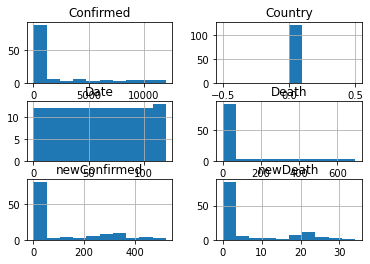

In [29]:
import matplotlib.pyplot as plt
data.hist()
plt.show()

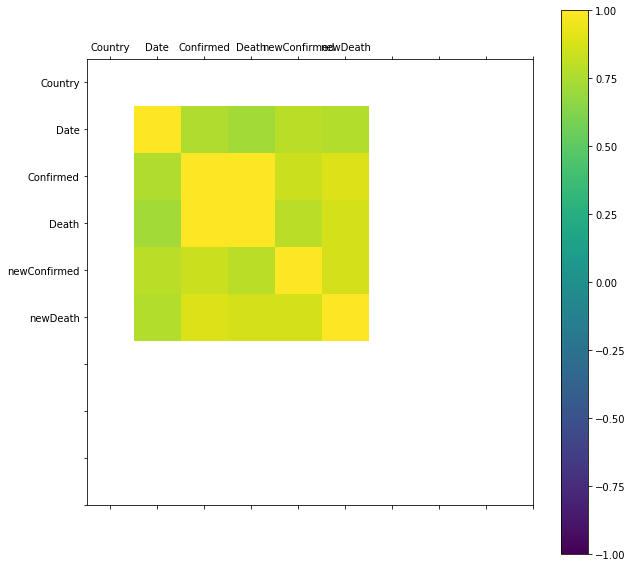

In [31]:
correlations = data.corr()
# plot correlation matrix
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111)
cax = ax.matshow(correlations, vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0,10,1)
ax.set_xticks(ticks)
ax.set_yticks(ticks)
ax.set_xticklabels(data.columns.values)
ax.set_yticklabels(data.columns.values)
plt.show()

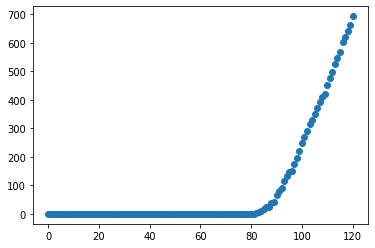

In [38]:
plt.scatter(data['Date'], data['Death'])
plt.show()

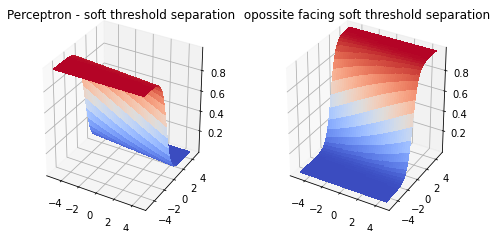

In [40]:
from matplotlib import cm
X1 = np.arange(-5, 5, 0.25)
Y1 = np.arange(-5, 5, 0.25)
X, Y = np.meshgrid(X1, Y1)
X,Y

fig = plt.figure(figsize=plt.figaspect(0.5))
ax = fig.add_subplot(1, 2, 1, projection='3d')

Z1=1/(1+np.exp(0.2*X+2*Y)) # two inputs, one output neuron (soft threshold)
Z2=1/(1+np.exp(-0.2*X-2*Y+1)) # oposing face soft threshold
surf = ax.plot_surface(X, Y, Z1, cmap=cm.coolwarm,linewidth=0, antialiased=False)
ax.set_title('Perceptron - soft threshold separation')

ax = fig.add_subplot(1, 2, 2, projection='3d')
surf = ax.plot_surface(X, Y, Z2, cmap=cm.coolwarm,linewidth=0, antialiased=False)
ax.set_title(' opossite facing soft threshold separation')
#surf = ax.plot_surface(X, Y, 1/(1+np.exp(Z1+Z2)), cmap=cm.coolwarm,linewidth=0, antialiased=False)

plt.show()